# 500_RQ1_Analysis_1

In [36]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
RQ1 = pd.read_csv('../../data/analysis/RQ1.csv')

In [38]:
RQ1 = RQ1.drop(RQ1.columns[[0]], axis=1)

In [39]:
RQ1.head(5)

,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,fan's_favourite_trait,Homegrown,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form
0,Lionel Messi,Forward,FC Barcelona,Spanish Primera Division,30,Argentina,93,https://cdn.sofifa.org/18/players/158023.png,False,False,False,42.00,8.255952,33.0,7.666667
1,Cristiano Ronaldo,Forward,Real Madrid CF,Spanish Primera Division,32,Portugal,94,https://cdn.sofifa.org/18/players/20801.png,False,False,False,41.00,7.926829,25.0,7.280000
2,Luis Suarez,Forward,FC Barcelona,Spanish Primera Division,30,Uruguay,92,https://cdn.sofifa.org/18/players/176580.png,False,False,False,41.25,7.018182,29.0,6.689655
3,Zlatan Ibrahimovic,Forward,Manchester United,English Premier League,35,Sweden,88,https://cdn.sofifa.org/18/players/41236.png,False,False,False,37.50,6.900000,5.0,1.200000
4,Robert Lewandowski,Forward,FC Bayern Munich,German Bundesliga,28,Poland,91,https://cdn.sofifa.org/18/players/188545.png,False,False,False,40.00,6.050000,28.0,6.785714


In [40]:
RQ1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791 entries, 0 to 1790
Data columns (total 15 columns):
Players                  1791 non-null object
Position                 1791 non-null object
club                     1791 non-null object
league                   1791 non-null object
age                      1791 non-null int64
nationality              1791 non-null object
overall                  1791 non-null int64
photo                    1791 non-null object
injury_prone_trait       1791 non-null bool
fan's_favourite_trait    1791 non-null bool
Homegrown                1791 non-null bool
Average Apps/Season      1791 non-null float64
Previous Average Form    1791 non-null float64
Apps This Season         1791 non-null float64
Current Average Form     1791 non-null float64
dtypes: bool(3), float64(4), int64(2), object(6)
memory usage: 173.2+ KB


In [41]:
list(RQ1)

['Players',
 'Position',
 'club',
 'league',
 'age',
 'nationality',
 'overall',
 'photo',
 'injury_prone_trait',
 "fan's_favourite_trait",
 'Homegrown',
 'Average Apps/Season',
 'Previous Average Form',
 'Apps This Season',
 'Current Average Form']

In [42]:
RQ1.groupby(['overall']).count()['Players']

overall
62      1
63      3
64      6
65      9
66      8
67     17
68     28
69     42
70     73
71     97
72    137
73    146
74    151
75    157
76    141
77    164
78    101
79    107
80     96
81     61
82     83
83     52
84     28
85     22
86     18
87     10
88     14
89      8
90      5
91      1
92      3
93      1
94      1
Name: Players, dtype: int64

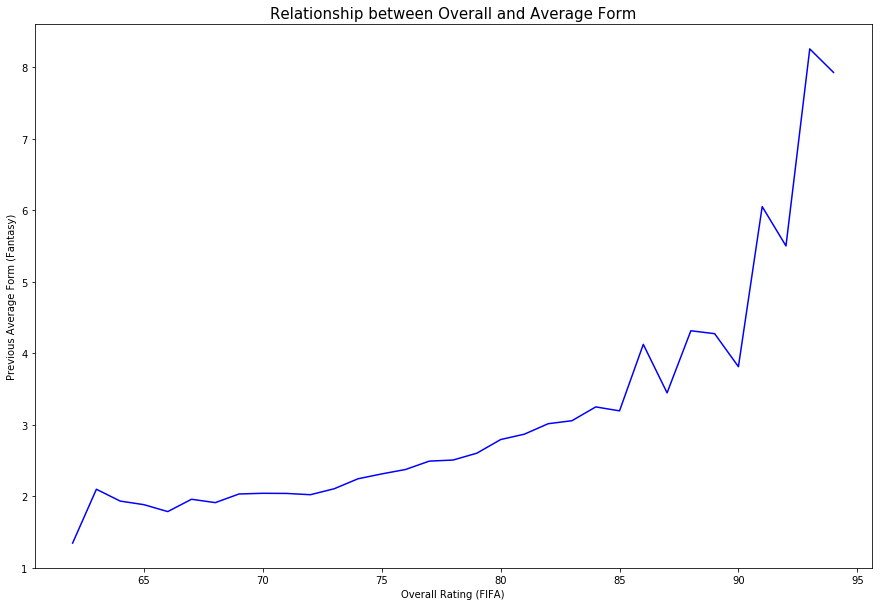

In [43]:
plt.figure(figsize=(15,10))
plt.plot(RQ1.groupby(['overall']).mean()['Previous Average Form'], color='blue')
plt.xlabel('Overall Rating (FIFA)')
plt.ylabel('Previous Average Form (Fantasy)')
plt.title('Relationship between Overall and Average Form',size=15)
plt.show()

In [44]:
RQ1['Previous Average Form'].corr(RQ1['overall'])

0.61854072490897671

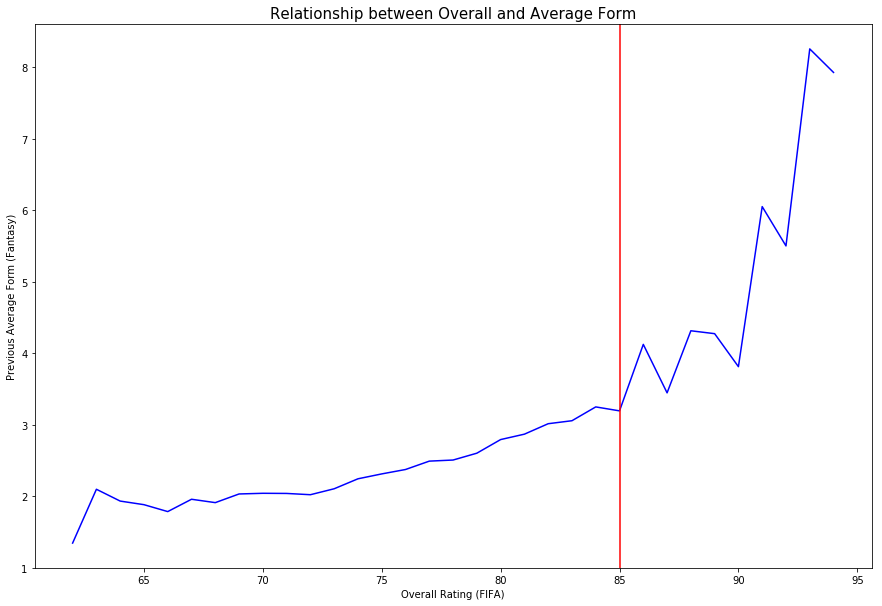

In [45]:
plt.figure(figsize=(15,10))
plt.plot(RQ1.groupby(['overall']).mean()['Previous Average Form'], color='blue')
plt.xlabel('Overall Rating (FIFA)')
plt.ylabel('Previous Average Form (Fantasy)')
plt.title('Relationship between Overall and Average Form',size=15)
plt.axvline(85, color='r')
plt.show()

In [71]:
RQ1['Position'].value_counts()

Midfielder    741
Defender      565
Forward       352
Goalkeeper    133
Name: Position, dtype: int64

In [76]:
pform = RQ1.groupby(['Position']).mean()['Previous Average Form'].to_frame()
pform

,Previous Average Form
Position,
Defender,2.327317
Forward,2.921338
Goalkeeper,2.534174
Midfielder,2.323260


TypeError: <lambda>() missing 1 required positional argument: 'height'

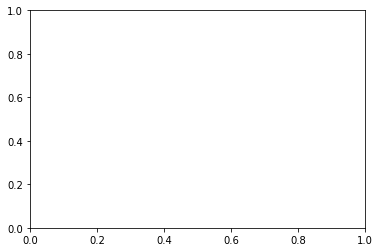

## Goalkeepers

In [47]:
RQ1_Goalkeepers = RQ1[RQ1['Position'] == 'Goalkeeper']

In [48]:
RQ1_Goalkeepers.count()['Players']

133

In [49]:
RQ1_Goalkeepers.groupby(['overall']).count()['Players']

overall
66     3
67     1
68     1
69     1
70     5
71     3
72     9
73     3
74    13
75     7
76     6
77    11
78     5
79    11
80    10
81     8
82    12
83     7
84     4
85     5
86     1
87     1
88     2
89     2
90     1
92     1
Name: Players, dtype: int64

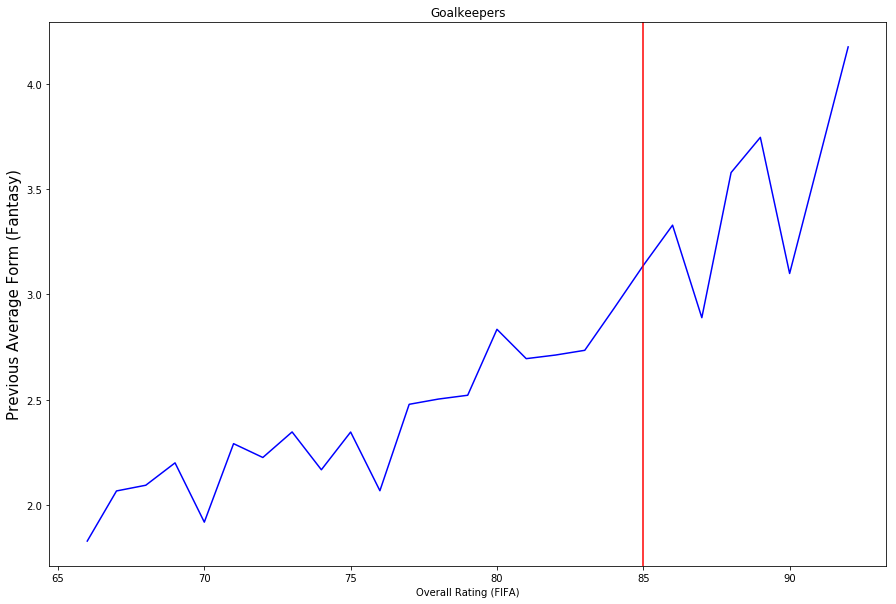

In [50]:
plt.figure(figsize=(15,10))
plt.plot(RQ1_Goalkeepers.groupby(['overall']).mean()['Previous Average Form'], color='blue')
plt.xlabel('Overall Rating (FIFA)')
plt.ylabel('Previous Average Form (Fantasy)',size=15)
plt.title('Goalkeepers')
plt.axvline(85, color='r')
plt.show()

In [51]:
RQ1_Goalkeepers['Previous Average Form'].corr(RQ1_Goalkeepers['overall'])

0.68849995414859944

## Defenders

In [52]:
RQ1_Defenders = RQ1[RQ1['Position'] == 'Defender']

In [53]:
RQ1_Defenders.count()['Players']

565

In [54]:
RQ1_Defenders.groupby(['overall']).count()['Players']

overall
64     2
65     2
66     2
67     4
68    15
69    13
70    25
71    41
72    48
73    49
74    46
75    54
76    52
77    57
78    21
79    40
80    24
81    17
82    14
83    13
84     8
85     6
86     5
88     5
89     1
90     1
Name: Players, dtype: int64

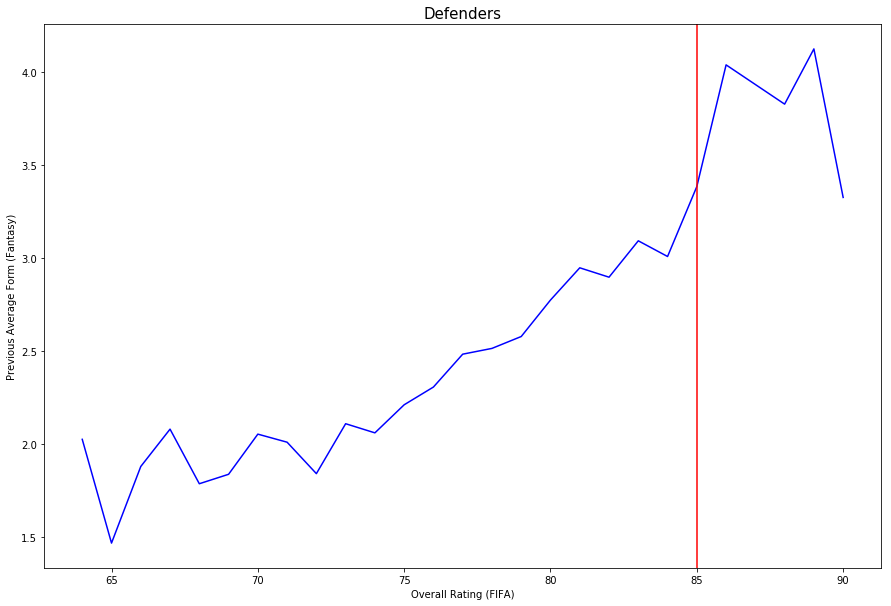

In [55]:
plt.figure(figsize=(15,10))
plt.plot(RQ1_Defenders.groupby(['overall']).mean()['Previous Average Form'], color='blue')
plt.xlabel('Overall Rating (FIFA)')
plt.ylabel('Previous Average Form (Fantasy)')
plt.title('Defenders',size=15)
plt.axvline(85, color='r')
plt.show()

In [56]:
RQ1_Defenders['Previous Average Form'].corr(RQ1_Defenders['overall'])

0.62626550414557913

## Midfielders

In [57]:
RQ1_Midfielders = RQ1[RQ1['Position'] == 'Midfielder']

In [58]:
RQ1_Midfielders.count()['Players']

741

In [59]:
RQ1_Midfielders.groupby(['overall']).count()['Players']

overall
62     1
63     3
64     2
65     6
66     3
67     9
68     7
69    17
70    32
71    34
72    48
73    75
74    60
75    62
76    53
77    66
78    55
79    39
80    39
81    22
82    38
83    25
84    13
85     9
86     7
87     8
88     3
89     3
90     2
Name: Players, dtype: int64

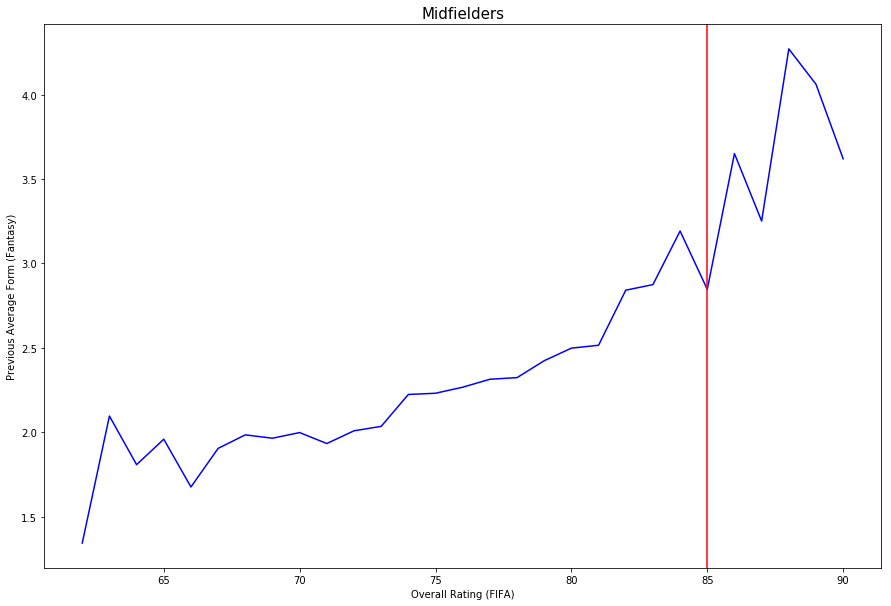

In [60]:
plt.figure(figsize=(15,10))
plt.plot(RQ1_Midfielders.groupby(['overall']).mean()['Previous Average Form'], color='blue')
plt.xlabel('Overall Rating (FIFA)')
plt.ylabel('Previous Average Form (Fantasy)')
plt.title('Midfielders',size=15)
plt.axvline(85, color='r')
plt.show()

In [61]:
RQ1_Midfielders['Previous Average Form'].corr(RQ1_Midfielders['overall'])

0.56668684897250909

## Forwards

In [62]:
RQ1_Forwards = RQ1[RQ1['Position'] == 'Forward']

In [63]:
RQ1_Forwards.count()['Players']

352

In [64]:
RQ1_Forwards.groupby(['overall']).count()['Players']

overall
64     2
65     1
67     3
68     5
69    11
70    11
71    19
72    32
73    19
74    32
75    34
76    30
77    30
78    20
79    17
80    23
81    14
82    19
83     7
84     3
85     2
86     5
87     1
88     4
89     2
90     1
91     1
92     2
93     1
94     1
Name: Players, dtype: int64

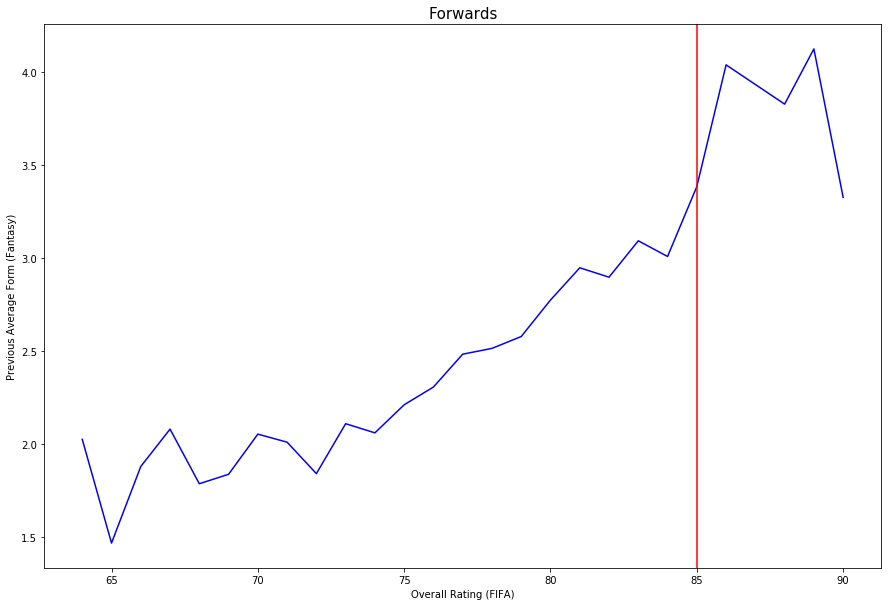

In [65]:
plt.figure(figsize=(15,10))
plt.plot(RQ1_Defenders.groupby(['overall']).mean()['Previous Average Form'], color='blue')
plt.xlabel('Overall Rating (FIFA)')
plt.ylabel('Previous Average Form (Fantasy)')
plt.title('Forwards',size=15)
plt.axvline(85, color='r')
plt.show()

In [66]:
RQ1_Forwards['Previous Average Form'].corr(RQ1_Forwards['overall'])

0.7831046835390989